<a href="https://colab.research.google.com/github/saharshayegan/AI-Challenge-2020/blob/master/SocialNetXNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
with open("/content/drive/MyDrive/twitter-April20/sahar_following_data-20220420", "rb") as fp:   # Unpickling
  sahar = pickle.load(fp)

# Load and vectorize the tweets of my friends
### **DO NOT RUN**

In [ ]:
import pandas as pd

In [ ]:
maanenaa = '2582056045'
if maanenaa not in sahar:
  sahar.append(maanenaa)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dec2021tweets.csv')
df2 =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nov2021tweets.csv')

In [ ]:
df= df.loc[df.apply(lambda x: x.user_id in sahar, axis=1)]
df2= df2.loc[df2.apply(lambda x: x.user_id in sahar, axis=1)]

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/oct2021tweets.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sep2021tweets.csv')

In [ ]:
df3= df3.loc[df3.apply(lambda x: x.user_id in sahar, axis=1)]
df4= df4.loc[df4.apply(lambda x: x.user_id in sahar, axis=1)]

In [ ]:
filtered = pd.concat([df, df2, df3, df4])

In [ ]:
del df
del df2
del df3
del df4

In [ ]:
filtered.shape

(15249, 18)

In [ ]:
filtered.columns

Index(['language', 'conversation_id', 'retweets_count', 'mentions',
       'created_at', 'likes_count', 'possibly_sensitive',
       'in_reply_to_user_id', '_id', 'source', 'user_id',
       'in_reply_to_status_id', 'tweet', 'replies_count', 'quoted_status_id',
       'hashtags', 'cashtags', 'urls'],
      dtype='object')

In [ ]:
uniques = filtered['user_id'].unique()

In [ ]:
len(uniques)

481

In [ ]:
import pickle
pickle_out = open("/content/drive/MyDrive/twitter-April20/uniques.pickle", "wb")
pickle.dump(uniques, pickle_out)
pickle_out.close()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()

In [ ]:
x = v.fit_transform(filtered['tweet'])

In [ ]:
arr = x.toarray()

In [ ]:
del x

In [ ]:
len(arr[0])

30470

In [ ]:
len(arr)

15249

# Find the tweets of each user and get the sum of their vectors
### **DO NOT RUN**

In [ ]:
filtered = filtered.reset_index(level=0)

In [ ]:
import numpy as np
user_vec = pd.DataFrame(columns=['user_id','vector'])
counter= 0
for id in sahar:
  print(counter, end=' ')
  counter+=1
  indices = (filtered.loc[filtered.apply(lambda x: x.user_id == id, axis=1)].reset_index(level=0))['level_0']
  vec_sum = np.zeros((1,len(arr[0])))
  for i in indices:
    vec_sum += arr[i]
  dic = {'user_id':id, 'vector':vec_sum/len(indices)}
  user_vec = user_vec.append(dic, ignore_index = True)

In [ ]:
del vec_sum

In [ ]:
# vec_sum

In [ ]:
print(user_vec.shape)
user_vec.head()

(699, 2)


,user_id,vector
0,865981751444852736,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,724963088286502912,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."
2,1020607462804795393,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,1339288641789628422,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,868167946505474050,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,..."


In [ ]:
# Instead of 'sahar' I should have used 'uniques'
# and checked in each loop if user_id is in 'uniques'
# because I have no tweets from the ones that are not in uniques
import string
from scipy.spatial import distance

# distance.euclidean(arr[0], arr[1])
cols = ['index'].extend(uniques)
df_ids = pd.DataFrame(columns=cols)
# df_ids['index'] = df_ids['index'].astype('str')
for index, row in user_vec.iterrows():

  if row['user_id'] in uniques:
    dist_dict = {}
    dist_dict['index']=str(row['user_id'])
    # print(row['user_id'])

    for ind, ro in user_vec.iterrows():

      # if ind > index and ro['user_id'] in uniques:
      if ro['user_id'] in uniques:

        if not np.isnan(row['vector']).any() and not np.isnan(ro['vector']).any():
          dist_dict[ro['user_id']] = distance.euclidean(row['vector'], ro['vector'])

    # print(dist_dict['index'])
    df_ids = df_ids.append(dist_dict, ignore_index = True)
    # print(df_ids['index'])
    # print('added {}'.format(row['user_id']))
    print(index, end=' ')


In [ ]:
# Want to sort the df columns so that the matrix is symmetric
sorting_list = ['index']
for i, row in user_vec.iterrows():
  if(row['user_id'] in uniques):
    sorting_list.append(row['user_id'])

df_ids = df_ids[sorting_list]

In [ ]:
# df_ids.columns

In [ ]:
df_ids['min'] = (df_ids[uniques])[df_ids[uniques]>0].idxmin(axis=1)

In [ ]:
# Moving the 'id' column to the begining
column_to_move = df_ids.pop("min")
# insert column with insert(location, column_name, column_value)
df_ids.insert(1, "min", column_to_move)

In [ ]:
df_ids

In [ ]:
df_ids.head(15)

In [ ]:
df_ids.to_csv('/content/drive/MyDrive/twitter-April20/Distance of My Network Users NLP.csv')

In [ ]:
del df_ids

# Create the nerwork

## Create the language network

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/twitter-April20/Distance of My Network Users NLP.csv')

In [ ]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df['index'] = df['index'].astype('str')

In [ ]:
import networkx as nx

In [ ]:
with open("/content/drive/MyDrive/twitter-April20/sahar_following_data-20220420", "rb") as fp:   # Unpickling
  sahar = pickle.load(fp)

In [ ]:
with open("/content/drive/MyDrive/twitter-April20/uniques.pickle", "rb") as fp:   # Unpickling
  uniques = pickle.load(fp)

In [ ]:
g_vecs = nx.Graph()
INF = 100000
str_uniques = [str(id) for id in uniques]
counter=0
for i,row in df.iterrows():
  for id in str_uniques:
    if g_vecs.has_edge(row['index'],id):
      counter+=1
    else:
      if(row[id]!=id):
        if(row[id]!=0):
          g_vecs.add_edge(row['index'],id, weight=1/row[id])
        elif(row[id] == 0):
          g_vecs.add_edge(row['index'],id, weight=INF)
        else:
          print(row[id])
print(counter,' edges added')

115440  edges added


In [ ]:
import numpy as np
average_weight=np.average([d['weight'] for (u, v, d) in g_vecs.edges(data=True) if d['weight']!=INF])

In [ ]:
# Save the graph
# nx.write_gexf(g_vecs, "/content/drive/MyDrive/twitter-April20/NLP network of my friends.gexf")

In [ ]:
max_weight = 0
weights_list = []
edges = g_vecs.edges
for edge in edges:
  if edge[0] != edge[1]:
    # print(g_vecs.get_edge_data(edge[0],edge[1])['weight'])
    max_weight = max(max_weight, g_vecs.get_edge_data(edge[0],edge[1])['weight'])
    weights_list.append(g_vecs.get_edge_data(edge[0],edge[1])['weight'])

In [ ]:
max_weight

8.827393276767106

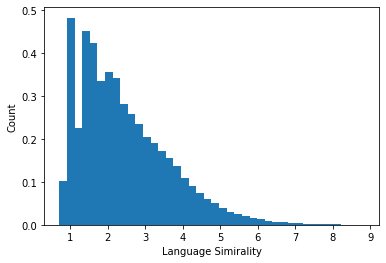

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x=weights_list
plt.hist(x, density=True, bins=40)  # density=False would make counts
plt.ylabel('Count')
plt.xlabel('Language Simirality');

In [32]:
print('edges: ', len(g_vecs.edges))
print('nodes: ', len(g_vecs.nodes))

edges:  115921
nodes:  481


## Draw the language network
##### I dont even need this

In [ ]:
#Do not run this

# I wanted to draw g but there might be a problem with the weights
# so I chosed the edge colors with g and drew g2 with that list
import matplotlib.pyplot as plt

elarge = [(u, v) for (u, v, d) in g_vecs.edges(data=True) if d["weight"] > average_weight or d['weight'] == INF]
esmall = [(u, v) for (u, v, d) in g_vecs.edges(data=True) if d["weight"] <= average_weight and  d['weight'] != INF]
# print(len(elarge))
# print(len(esmall))
# print(len(elarge)+len(esmall)) ## WHY THIS IS NOT EQUAL TO LEN(EDGES)?
pos = nx.spring_layout(g_vecs,seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(g_vecs, pos, node_size=7, node_color='w')

# edges
nx.draw_networkx_edges(g_vecs, pos, edgelist=elarge, width=0.01, edge_color='r')
nx.draw_networkx_edges(
    g_vecs, pos, edgelist=esmall, width=0.006, alpha=0.5, edge_color="b", style="dashed"
)

# labels
# nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
fig = plt.figure()

ax = plt.gca()
plt.figure(figsize=(15,7.5),dpi=80) 
ax.margins(0.08)
plt.axis("off")
# plt.draw()
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/twitter-April20/plot2.png')
plt.show()
fig.savefig('figure', dpi = 150)

In [ ]:
plt.savefig('/content/drive/MyDrive/twitter-April20/plot2.png')

<Figure size 432x288 with 0 Axes>

## Load the data of your friends and their friends

In [ ]:
import networkx as nx

In [ ]:
import pickle
with open("/content/drive/MyDrive/twitter-April20/sahar_following_data-20220420", "rb") as fp:   # Unpickling
  sahar = pickle.load(fp)

In [63]:
import os
path = '/content/drive/MyDrive/twitter-April20/data/'
files = [file for file in os.listdir(path)]
# print(files)

## Create the graph of your friends

In [41]:
len(sahar)

698

In [62]:
g_fr = nx.Graph()
for file in files:
  id = file.split(sep='_')[0]
  if id in map(str, uniques):
    with open("/content/drive/MyDrive/twitter-April20/data/{}".format(file), "rb") as fp:
      friends = pickle.load(fp)
    for friend in friends:
      if friend in uniques:
        g_fr.add_edge(id, str(friend))

In [60]:
type(friend)

int

In [59]:
print('edges: ', len(g_fr.edges))
print('nodes: ', len(g_fr.nodes))

edges:  0
nodes:  0


int